# Data cleaning and Outlier Detection

# Importing the necessary Packages

In [169]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency  # For T-test and Chi-Square test
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

In [171]:
# Enable future behavior explicitly
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [173]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
# Merge features and target using the index
df = X.join(y)

In [174]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### DATA CLEANING

In [176]:
# Clean 'income' column
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)

In [177]:
income_counts = df['income'].value_counts()
print(income_counts)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [179]:
 for col in df:
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        print("-" * 40)

Unique values in 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
----------------------------------------
Unique values in 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
----------------------------------------
Unique values in 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
----------------------------------------
Unique values in 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------------------------------------
Unique values in 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------------------------------------
Unique values in 'marital-status

In [184]:
# saving a copy of the original data frame to compare later
df_original=df


In [186]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [188]:
# work class,occupation and native-country has null values 

In [190]:
# Replace '?' and blanks with NaN
df.replace(['?', ' '], np.nan, inplace=True)

In [192]:
df['workclass'] = df.groupby(['education'])['workclass'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

In [194]:
# Then, fill NaN values in 'occupation' based on the updated 'workclass' and 'education'
df['occupation'] = df.groupby(['workclass', 'education'])['occupation'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

In [196]:
df['occupation'] = df.groupby(['education','income'])['occupation'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

In [198]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [200]:
# Handling the country name corrections

df['native-country'].replace({'Hong':'Hongkong','Trinadad&Tobago':'Trinidad and Tobago','Holand-Netherlands':'Netherlands','South':'South Korea'},inplace=True)

C:\Users\Sitab\AppData\Local\Temp\ipykernel_11860\1823592180.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].replace({'Hong':'Hongkong','Trinadad&Tobago':'Trinidad and Tobago','Holand-Netherlands':'Netherlands','South':'South Korea'},inplace=True)


In [202]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [204]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

# What are Outliers?
Outliers are data points that significantly deviate from other observations in a dataset. They can be caused by measurement errors, data entry mistakes, or genuine extreme values that represent rare but valid occurrences.

Why Handle Outliers?
Outliers can negatively impact machine learning models by:

Skewing statistical measures (mean, standard deviation)
Affecting model performance and accuracy
Leading to overfitting on extreme cases
Distorting feature distributions
Causing instability in gradient-based algorithms

# Types of Outliers
Global Outliers (Point Anomalies)
Individual data points that are far from the rest of the dataset when considering all features.

Contextual Outliers (Conditional Anomalies)
Data points that are outliers within a specific context but normal in others (e.g., high temperature in winter).

Collective Outliers
A collection of data points that together form an outlying pattern, though individual points may not be outliers.

## Detection Methods

### Statistical Methods

**Z-Score Method**
- Measures how many standard deviations away from the mean
- Threshold typically set at |z| > 2.5 or 3
- Assumes normal distribution

**Modified Z-Score**
- Uses median absolute deviation (MAD) instead of standard deviation
- More robust to outliers than standard Z-score
- Threshold typically set at |modified z| > 3.5

**Interquartile Range (IQR)**
- Q1 = 25th percentile, Q3 = 75th percentile
- IQR = Q3 - Q1
- Outliers: < Q1 - 1.5×IQR or > Q3 + 1.5×IQR

### Distance-Based Methods

**Local Outlier Factor (LOF)**
- Measures local density deviation of data points
- Compares local density of a point with densities of its neighbors
- Good for datasets with varying densities

**Isolation Forest**
- Tree-based method that isolates outliers
- Outliers require fewer splits to isolate
- Effective for high-dimensional data

**DBSCAN**
- Density-based clustering algorithm
- Points not belonging to any cluster are considered outliers
- Good for identifying clusters of varying shapes

### Machine Learning Methods

**One-Class SVM**
- Learns a decision function for novelty detection
- Effective when you have mostly normal data for training

**Autoencoders**
- Neural networks that learn to reconstruct input data
- High reconstruction error indicates potential outliers
- Useful for high-dimensional data
- 
**Elliptic Envelope**
- Assumes data comes from a known distribution
- Fits an ellipse to central data points
- Points outside the ellipse are outliers

## Handling Strategies
1. Removal
When to use:

Clear data entry errors
Measurement mistakes
Small percentage of total data
Considerations:

May lose valuable information
Reduces dataset size
Can introduce bias if outliers represent legitimate cases
2. Transformation
Log Transformation

Reduces impact of extreme values
Useful for right-skewed distributions
Applied as: log(x + 1) to handle zeros
Square Root Transformation

Less aggressive than log transformation
Good for count data with outliers
Box-Cox Transformation

Generalizes log and square root transformations
Automatically finds optimal transformation parameter
3. Capping/Winsorization
Percentile Capping

Replace values above 95th percentile with 95th percentile value
Replace values below 5th percentile with 5th percentile value
Preserves data points while reducing extreme impact
Arbitrary Capping

Set upper and lower bounds based on domain knowledge
More interpretable than statistical methods
4. Imputation
Mean/Median Replacement

Replace outliers with mean (normal distribution) or median (skewed distribution)
Simple but may reduce variance
Model-Based Imputation

Use regression or other ML models to predict replacement values
More sophisticated but computationally expensive
5. Binning/Discretization
Convert continuous variables into categorical bins
Reduces impact of extreme values
May lose information granularity
6. Robust Methods
Use Robust Algorithms

Tree-based models (Random Forest, XGBoost) are naturally robust
Median-based statistics instead of mean-based
Huber loss instead of squared loss
Robust Scaling

Use RobustScaler (median and IQR) instead of StandardScaler
Less sensitive to outliers

### Handling the Numeric columns - age,work hours per week and net captial

In [210]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
df['income'] = df['income'].astype(int)  # Convert to integer
df_numeric = df[['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week','income']]

In [212]:
df_numeric.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


#### Dropping Fnlwgt column(don't contribute in the prediction model) as negatively correlated to the income target column.

# checking the distribution of age column

<Axes: xlabel='age', ylabel='Count'>

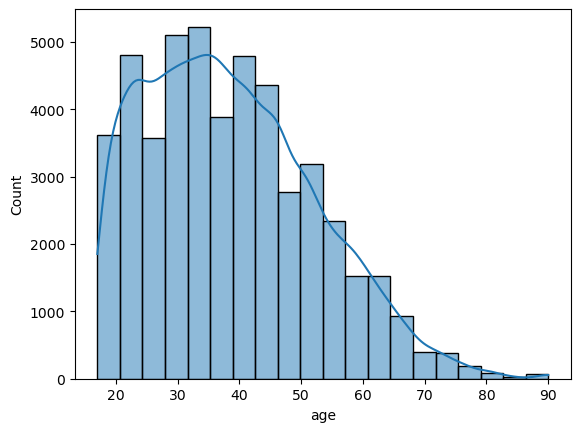

In [217]:
sns.histplot(data=df,x='age',kde=True,bins=20)

distribution is right-skewed (positively skewed) with a long tail extending toward higher ages. The distribution appears to peak around age 35-40 and then gradually decreases.

# checking the outliers in age column

<Axes: xlabel='age'>

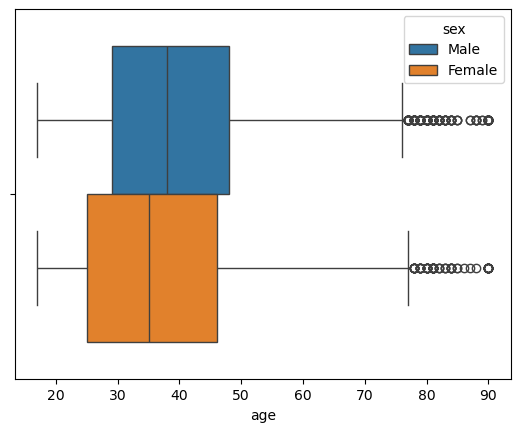

In [221]:
sns.boxplot(data=df,x='age',hue='sex')

#### Log trasformation to change the distribution to Normal distribution

Logarithmic transformation - Most commonly used for age data and right-skewed distributions

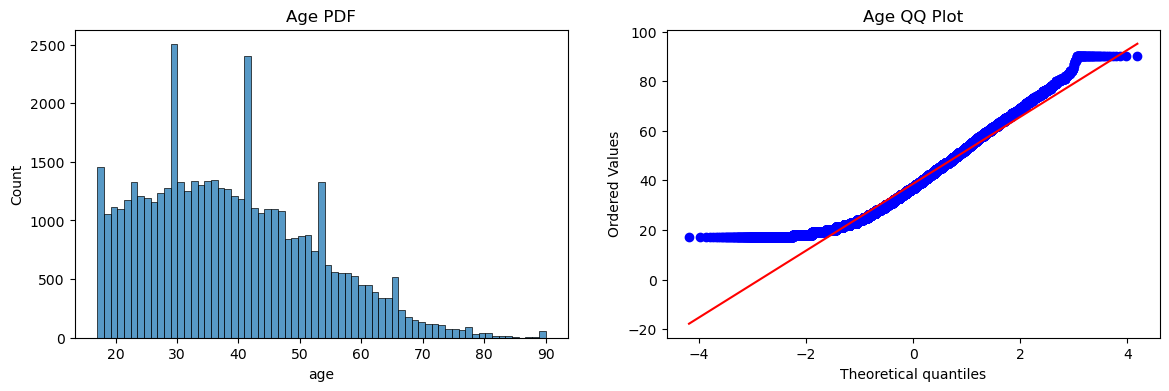

In [225]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

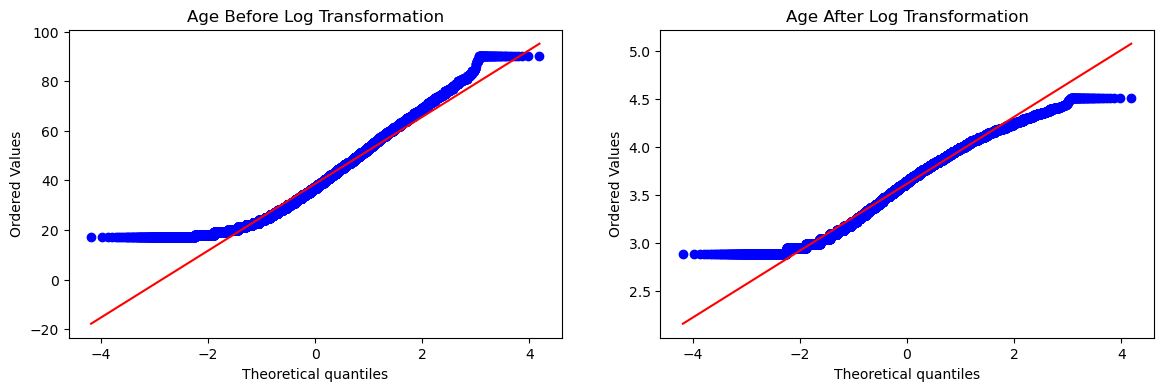

In [226]:
df['age_log'] = np.log1p(df['age'])

# QQ Plot before and after log transformation
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title("Age Before Log Transformation")

plt.subplot(122)
stats.probplot(df['age_log'], dist="norm", plot=plt)
plt.title("Age After Log Transformation")

plt.show()

In [227]:
print("Skewness before log transformation:", skew(df['age']))
print("Skewness after log transformation:", skew(df['age_log']))

Skewness before log transformation: 0.5575631924658626
Skewness after log transformation: -0.11374478357768275


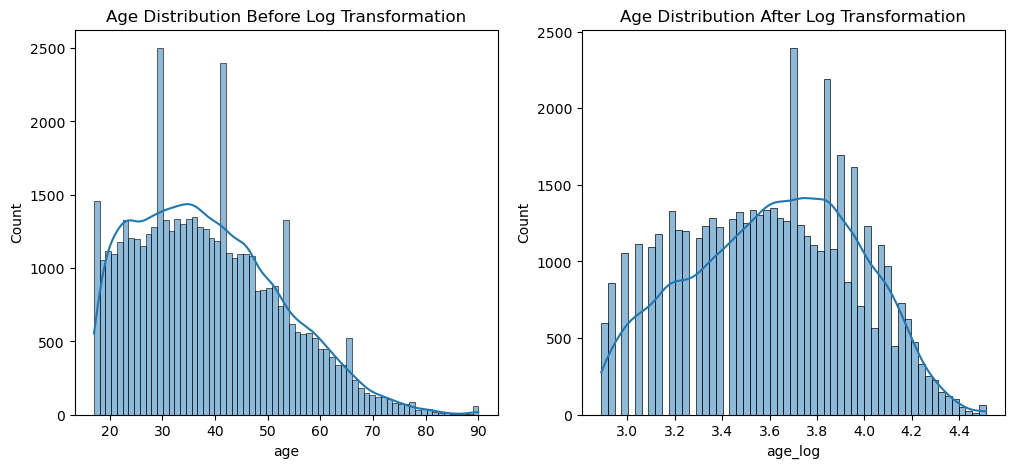

In [229]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution Before Log Transformation")

plt.subplot(122)
sns.histplot(df['age_log'], kde=True)
plt.title("Age Distribution After Log Transformation")

plt.show()

checking the distribution of hours-per-week

<Axes: xlabel='hours-per-week', ylabel='Count'>

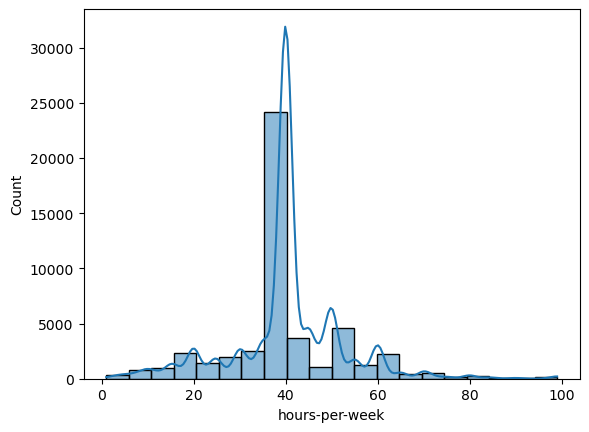

In [233]:
sns.histplot(data=df,x='hours-per-week',kde=True,bins=20)

<Axes: xlabel='hours-per-week'>

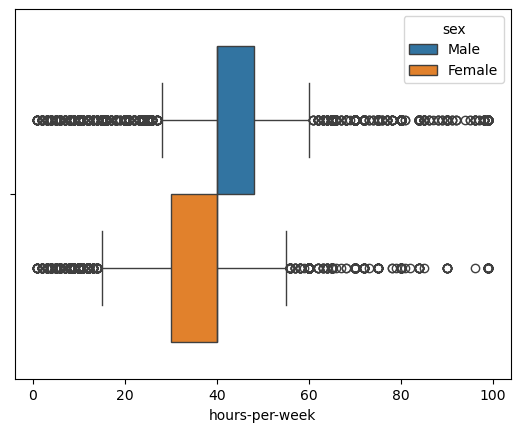

In [234]:
sns.boxplot(data=df,x='hours-per-week',hue='sex')

# checking the count of records greater than 60,70 and 80 per weeek

In [236]:
print(f"Values > 60: {(df['hours-per-week'] > 60).sum()}")
print(f"Values > 70: {(df['hours-per-week'] > 70).sum()}")
print(f"Values > 80: {(df['hours-per-week'] > 80).sum()}")
print (f"Values < 20: {(df['hours-per-week'] <20).sum()}")

Values > 60: 1676
Values > 70: 774
Values > 80: 318
Values < 20: 2591


In [237]:
# Assuming df is your DataFrame and 'hours-per-week' is the column
df['hours-per-week-wins'] = winsorize(df['hours-per-week'], limits=[0.01, 0.01])

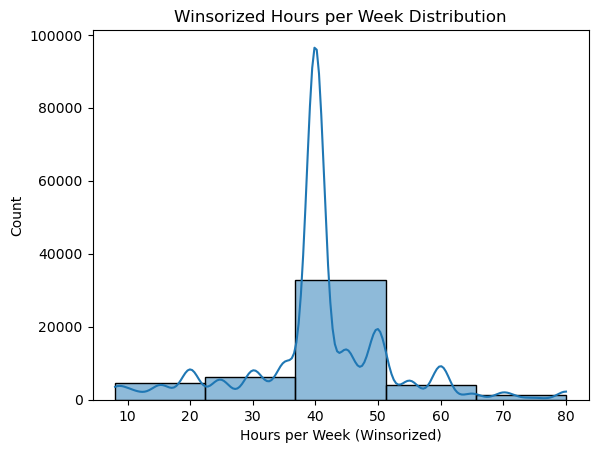

In [238]:
sns.histplot(df['hours-per-week-wins'], kde=True,bins=5)
plt.xlabel('Hours per Week (Winsorized)')
plt.ylabel('Count')
plt.title('Winsorized Hours per Week Distribution')
plt.show()

# Winsorized Distribution: Cleaner & Statistically Stable
The sharp spike at 40 hours/week (the mode) is preserved.
The long tails have been effectively suppressed, especially on the right side, without removing data.
The KDE plot is smoother and more trustworthy for modeling or descriptive analysis.

#### Data Standardization 

In [242]:
scaler = StandardScaler()
df['hours-per-week-wins-scaled'] = scaler.fit_transform(df[['hours-per-week-wins']])

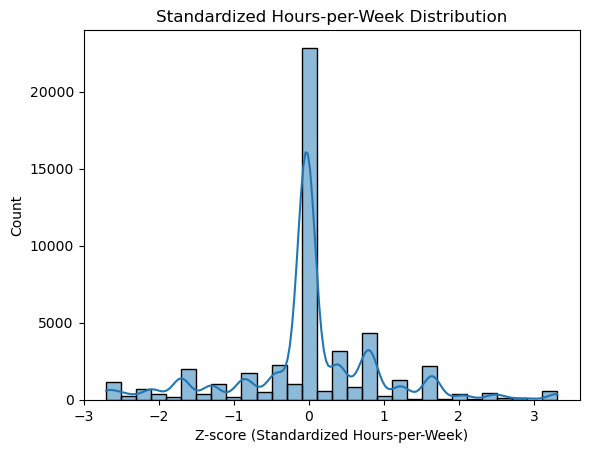

In [244]:
sns.histplot(df['hours-per-week-wins-scaled'], bins=30, kde=True)
plt.title('Standardized Hours-per-Week Distribution')
plt.xlabel('Z-score (Standardized Hours-per-Week)')
plt.ylabel('Count')
plt.show()

In [248]:
df['hours-per-week-wins-scaled'].skew()

0.01644448521771608

In [250]:
df.rename(columns={'hours-per-week-wins-scaled': 'hours-per-week'}, inplace=True)

#### This z-score is very close to 0, indicating that the corresponding hours-per-week value is extremely close to the mean of the distribution.

# Creating a Net Capital Gain/Loss Column
1) Calculated net capital by subtracting capital-loss from capital-gain.

2) Created a new column capital_net to store this net value.

3) This helps combine gains and losses into a single meaningful feature for easier analysis.


In [257]:
df['capital_net'] = df['capital-gain'] - df['capital-loss']

#### Dropping capital-gain and capital-loss snice combined in to capital_net.

In [260]:
df.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

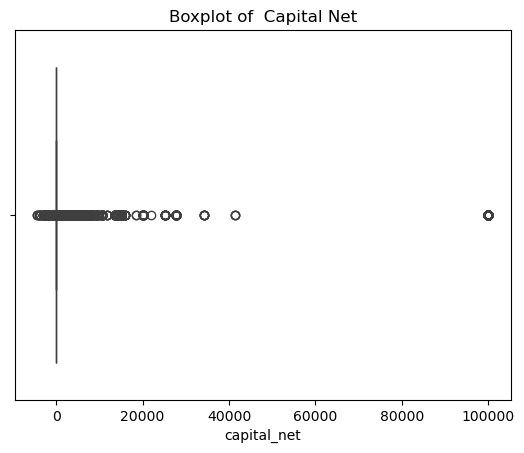

In [262]:
#checking the outliers
sns.boxplot(x=df['capital_net'])  
plt.title("Boxplot of  Capital Net")
plt.show()

# Two Methods of treating the outliers in Capital_net column

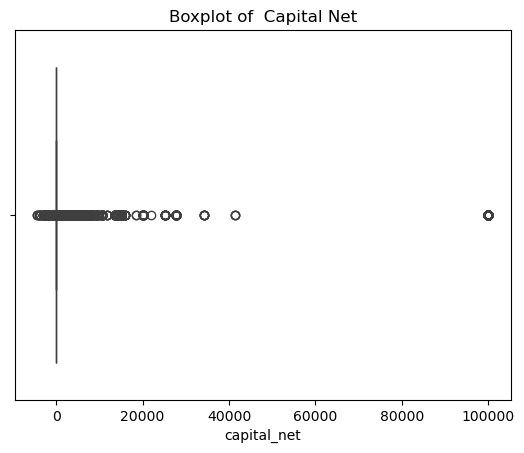

In [265]:
#checking the outliers
sns.boxplot(x=df['capital_net'])  
plt.title("Boxplot of  Capital Net")
plt.show()

In [267]:
def analyze_outliers(df, columns, income_col='income'):
    results = {}
    total_rows = len(df)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers = df[outlier_mask]
        count_by_income = outliers[income_col].value_counts().to_dict()
        total_outliers = outlier_mask.sum()
        percent_outliers = (total_outliers / total_rows) * 100
        results[col] = {
            'total_outliers': total_outliers,
            '%_Outliers': round(percent_outliers, 2),
            '<=50K': count_by_income.get('<=50K', 0),
            '>50K': count_by_income.get('>50K', 0),
            'lower_bound': round(lower_bound, 2),
            'upper_bound': round(upper_bound, 2)
        }
    return pd.DataFrame(results).T
# Specify columns to check
columns_to_check = ['capital_net']
outlier_summary = analyze_outliers(df, columns_to_check)
# Display table with headers
print(tabulate(outlier_summary.reset_index(), headers='keys', tablefmt='grid'))

+----+-------------+------------------+--------------+---------+--------+---------------+---------------+
|    | index       |   total_outliers |   %_Outliers |   <=50K |   >50K |   lower_bound |   upper_bound |
+====+=============+==================+==============+=========+========+===============+===============+
|  0 | capital_net |             6317 |        12.93 |       0 |      0 |             0 |             0 |
+----+-------------+------------------+--------------+---------+--------+---------------+---------------+


### Grouping the capital_net column as categorical variable 

In [270]:
df['net-capital-group'] = df['capital_net'].apply(lambda nc: 'Loss' if nc < 0 else 'Neutral' if nc == 0 else 'Gain')

In [272]:
df['net-capital-group'].value_counts()

net-capital-group
Neutral    42525
Gain        4035
Loss        2282
Name: count, dtype: int64

### Data Transformation Methods:

#### Using the Yeo-Johnson Transformation on the net-capital column as it works with zero and negative values.

In [276]:
# Initialize transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Apply Yeo-Johnson to 'net-capital' and store in new column
df['net-capital-yeojohnson'] = pt.fit_transform(df[['capital_net']])

### Below is the Box plot visualization before and after applying Yeo Johnson Transformation

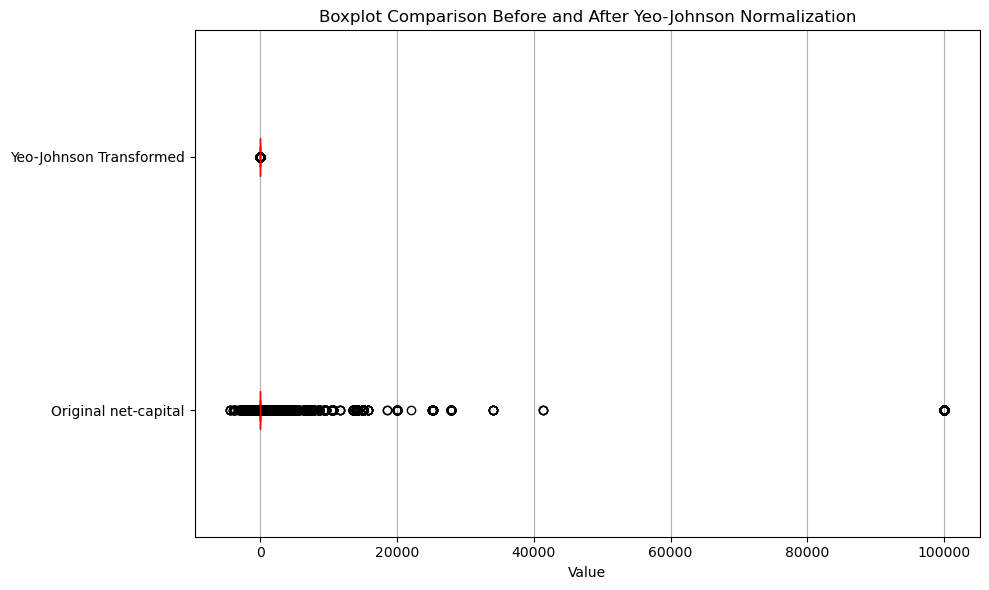

In [279]:
df.loc[0, 'capital_net'] = 99999   # Extreme positive outlier
df.loc[1, 'capital_net'] = -4356   # Extreme negative outlier

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['net-capital-yeojohnson'] = pt.fit_transform(df['capital_net'].values.reshape(-1, 1))

# Updated: Use tick_labels instead of labels
plt.figure(figsize=(10, 6))
plt.boxplot(
    [df['capital_net'], df['net-capital-yeojohnson']],
    vert=False,
    tick_labels=['Original net-capital', 'Yeo-Johnson Transformed'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='red')
)

plt.title('Boxplot Comparison Before and After Yeo-Johnson Normalization')
plt.xlabel('Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [290]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income', 'age_log', 'hours-per-week-wins',
       'hours-per-week', 'capital_net', 'net-capital-group',
       'net-capital-yeojohnson'],
      dtype='object')

### Regrouping the category columns to reduce the number of category making suitable for Encoding 

#### Regrouping the marital_group and educational group

In [292]:
def group_education(level):
    if level == 'Preschool':
        return 'Preschool'
    elif level in ['1st-4th', '5th-6th', '7th-8th']:
        return 'Primary'
    elif level in ['9th', '10th', '11th', '12th']:
        return 'High-School'
    elif level == 'HS-grad':
        return 'High-School-Grad'
    elif level == 'Some-college':
        return 'Some-College'
    elif level in ['Assoc-voc', 'Assoc-acdm']:
        return 'Assoc'
    elif level == 'Bachelors':
        return 'Bachelors-Degree'
    elif level in ['Masters', 'Prof-school', 'Doctorate']:
        return 'Advanced-Degree'
    else:
        return 'Other'

df['education'] = df['education'].apply(group_education)

In [294]:
def group_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'Married'
    elif status == 'Never-married':
        return 'Never-Married'
    elif status in ['Separated', 'Married-spouse-absent']:
        return 'Separated'
    elif status == 'Divorced':
        return 'Divorced'
    elif status == 'Widowed':
        return 'Widowed'
    else:
        return 'Other'

# Overwrite the original column with grouped values
df['marital-status'] = df['marital-status'].apply(group_marital_status)

In [296]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income', 'age_log', 'hours-per-week-wins',
       'hours-per-week', 'capital_net', 'net-capital-group',
       'net-capital-yeojohnson'],
      dtype='object')